# 1. Load data

In [134]:
import pandas as pd
import numpy as np

In [135]:
#read the xls file
data = pd.read_excel('7098-word-sound-errors-dataset.xlsx')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6228 entries, 0 to 6227
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   transcriptFile                         6228 non-null   object 
 1   id                                     6228 non-null   int64  
 2   podcast                                6228 non-null   object 
 3   podcastId                              6228 non-null   object 
 4   classLevel                             6228 non-null   object 
 5   classMasterType                        6228 non-null   object 
 6   longFormError                          6228 non-null   object 
 7   machineLongFormError                   5679 non-null   object 
 8   machineLongFormErrorFromTime           6226 non-null   object 
 9   longFormStart                          6228 non-null   float64
 10  longFormEnd                            6228 non-null   float64
 11  inte

In [136]:
data.head()

,transcriptFile,id,podcast,podcastId,classLevel,classMasterType,longFormError,machineLongFormError,machineLongFormErrorFromTime,longFormStart,...,isMachineErrorFound,isErrorCorrectedBySpeaker,classContextual,soundSupplantedIntendedWordPosition,isTranscriptCorrected,isTranscriptFaithful,longFormErrorEditDistance,soundSupplantedIntendedWordPosition.1,soundSupplantedIntendedSyllableRole,wordLexicalWordError
0,/content/drive/MyDrive/09_errorasr/Transcripts...,2,ac,ac083,Phrase,Lexical Substitution,... you can do this with a /settle xxx of razo...,you can do this with a set of razor blades in ...,"You can do this with a set of razor blades, in...",330.211,...,True,True,False,NaN,True,False,3,NaN,NaN,Y
1,/content/drive/MyDrive/09_errorasr/Transcripts...,4,ac,ac083,Sound,Phonological Substitution,"... and then there's the /[ʔoʊl] xxx whole, we...",and then there's the whole well are we really ...,"And then there's the whole, well, are we reall...",1552.418,...,True,True,False,Medial,False,True,0,Medial,Onset,N
2,/content/drive/MyDrive/09_errorasr/Transcripts...,7,ac,ac083,Sound,Phonological Addition,Is that true? Can you really /nots observe the...,is that true can you really not observe the wa...,is that true? Can you really not observe the w...,1517.966,...,True,False,False,NotAppl,True,False,1,NotAppl,NotAppl,N
3,/content/drive/MyDrive/09_errorasr/Transcripts...,9,ac,ac083,Sound,Phonological Addition,Everything that makes astronomy work /[goʊvz] ...,everything that makes astronomy work goes back...,Everything that makes astronomy work goes back...,1640.632,...,True,False,True,NotAppl,False,True,5,NotAppl,NotAppl,N
4,/content/drive/MyDrive/09_errorasr/Transcripts...,10,ac,ac084,Sound,Phonological Addition,"... they're passing over mid-America, they're ...",they're passing over midamerica they're passin...,"they're passing over mid-America, they're pass...",594.078,...,True,True,True,NotAppl,False,False,11,NotAppl,NotAppl,Likely Non-word



# Step 1: Data Overview

In [137]:

missing_values = data.isnull().sum()

# Step 2: Statistical Summary for Numerical Features
numerical_summary = data.describe()

# Step 3: Statistical Summary for Categorical Features
categorical_summary = data.describe(include=['object'])

# Display missing values
print("Missing Values Analysis:\n", missing_values)

# Display summaries
print("\nNumerical Summary:\n", numerical_summary)
print("\nCategorical Summary:\n", categorical_summary)

Missing Values Analysis:
 transcriptFile                              0
id                                          0
podcast                                     0
podcastId                                   0
classLevel                                  0
classMasterType                             0
longFormError                               0
machineLongFormError                      549
machineLongFormErrorFromTime                2
longFormStart                               0
longFormEnd                                 0
interuptionCount                            0
clippedWordCount                            0
uniqueSpeakerCount                          0
shortFormError                             10
shortFormIntended                           0
machineShortFormError                    2315
machineShortFormErrorFromTime               2
shortFormStart                              0
shortFormEnd                                0
isMachineErrorFound                         0
isErrorC

# 1. Visualization of Distribution of Numerical Features
## 1.1 Plotting graphs for Error starting and end

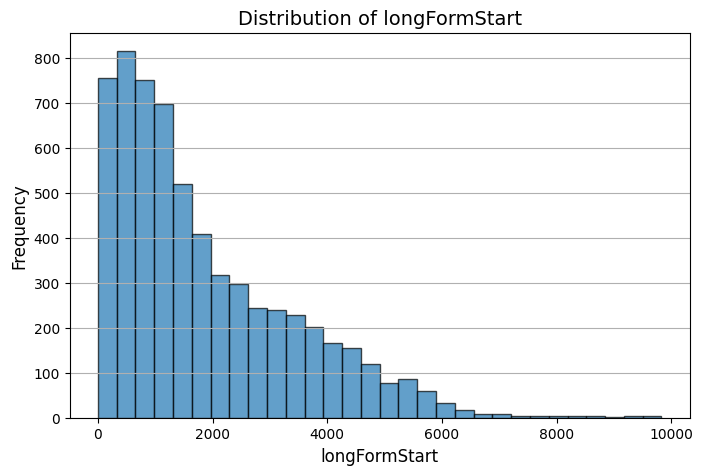

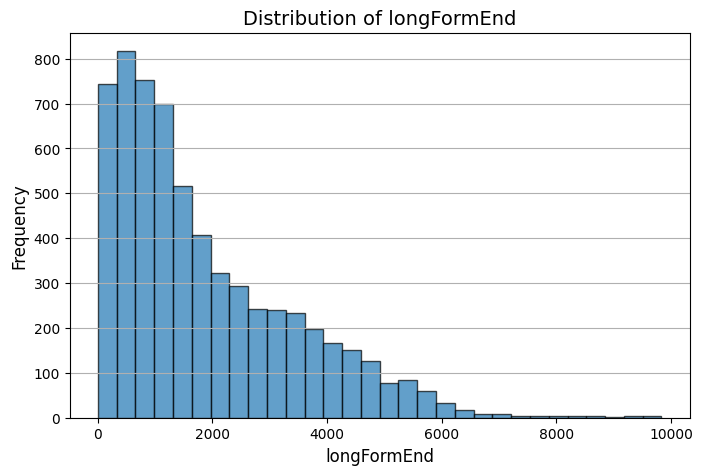

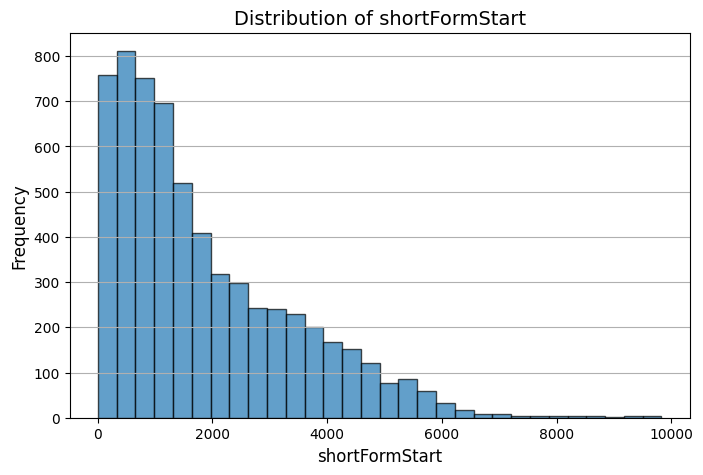

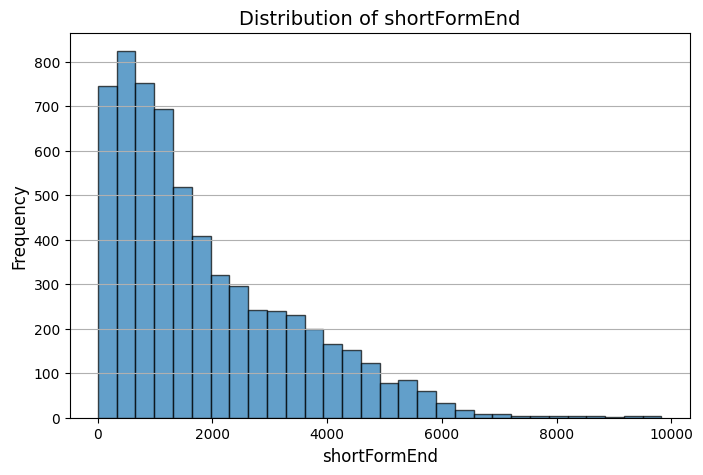

In [138]:
import matplotlib.pyplot as plt
%matplotlib inline

numerical_columns = ['longFormStart', 'longFormEnd', 'shortFormStart', 'shortFormEnd']

for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    plt.hist(data[col].dropna(), bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y')
    plt.show()



## 1.2 Distribution of Interruption count

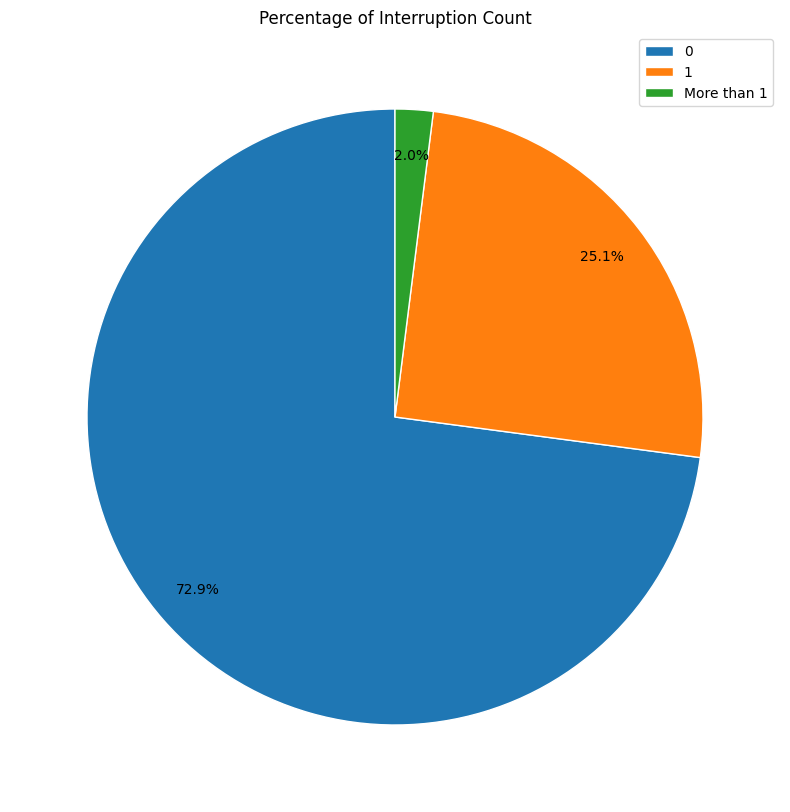

In [139]:
# Generate the counts and labels directly from the data
sizes = data['interuptionCount'].value_counts()

# Keep only the counts for '0' and '1', merge everything else into 'Others'
sizes_combined = sizes.copy()
others_count = sizes_combined.drop(labels=[0, 1], errors='ignore').sum()
sizes_combined = sizes_combined.loc[[0, 1]]
sizes_combined['More than 1'] = others_count

# Update the labels after merging
labels = sizes_combined.index

# Create the pie chart with the specified slices
plt.figure(figsize=(10, 10))
plt.pie(
    sizes_combined,
    labels=None,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85,  # Moves the percentage labels further out
    labeldistance=1.15,  # Moves the labels further out
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}  # Adds a white border between slices
)
plt.legend(labels, loc='upper right')
plt.title('Percentage of Interruption Count')
plt.show()

## 1.3 Distribution of word count

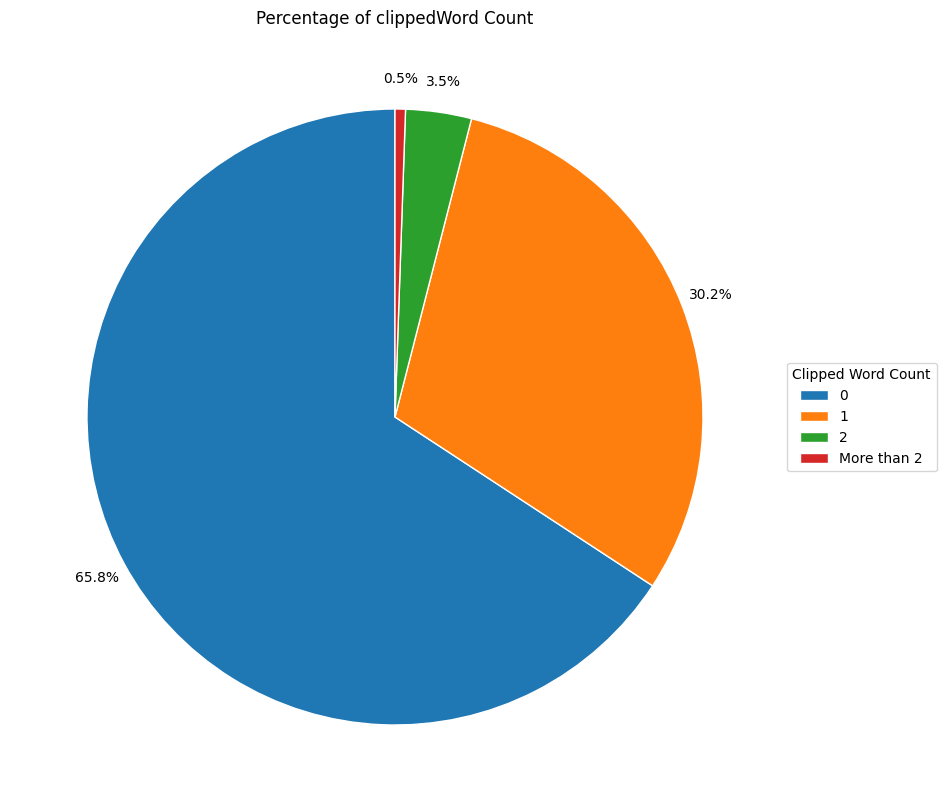

In [140]:
# Generate the counts and labels directly from the data
sizes = data['clippedWordCount'].value_counts()

# Keep only the counts for '0' and '1', merge everything else into 'Others'
sizes_combined = sizes.copy()
others_count = sizes_combined.drop(labels=[0, 1, 2], errors='ignore').sum()
sizes_combined = sizes_combined.loc[[0, 1, 2]]
sizes_combined['More than 2'] = others_count

# Update the labels after merging
labels = sizes_combined.index

# Create the pie chart with the specified slices
plt.figure(figsize=(10, 10))
plt.pie(
    sizes_combined,
    labels=None,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=1.1,  # Moves the percentage labels further out
    labeldistance=1.15,  # Moves the labels further out
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}  # Adds a white border between slices
)
plt.legend(labels, title="Clipped Word Count", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Percentage of clippedWord Count')
plt.show()

## 1.4 Distribution of Class Master Level Type

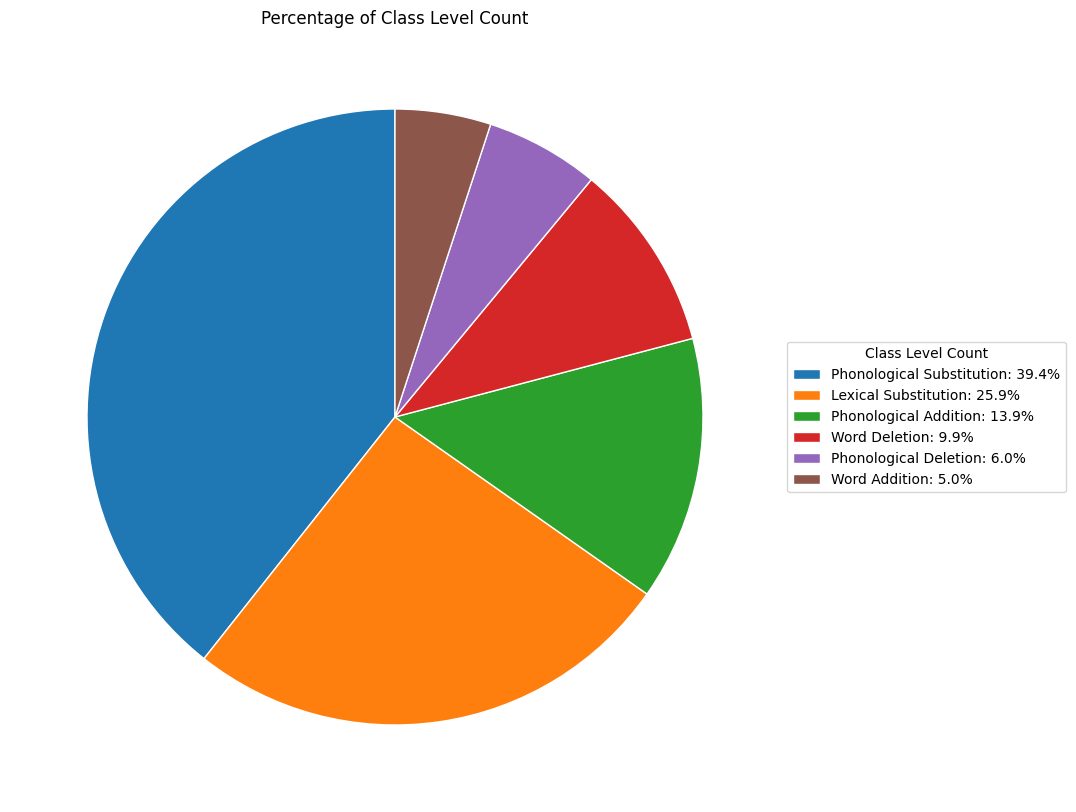

In [141]:
# Generate the counts and labels directly from the data
sizes = data['classMasterType'].value_counts()

# Update the labels after merging
labels = sizes.index
percentages = [f"{label}: {size / sizes.sum() * 100:.1f}%" for label, size in zip(labels, sizes)]

# Create the pie chart without percentage labels
plt.figure(figsize=(10, 10))
wedges, texts = plt.pie(
    sizes,
    labels=None,  # Remove labels from the pie slices
    startangle=90,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}  # Adds a white border between slices
)

# Add a legend for the labels without percentages
#add percentage to labels

labels = [f"{label}: {size / sizes.sum() * 100:.1f}%" for label, size in zip(labels, sizes)]
plt.legend(wedges, labels, title="Class Level Count", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Percentage of Class Level Count')
plt.show()

## 1.5 Distrubution of Class Level Error

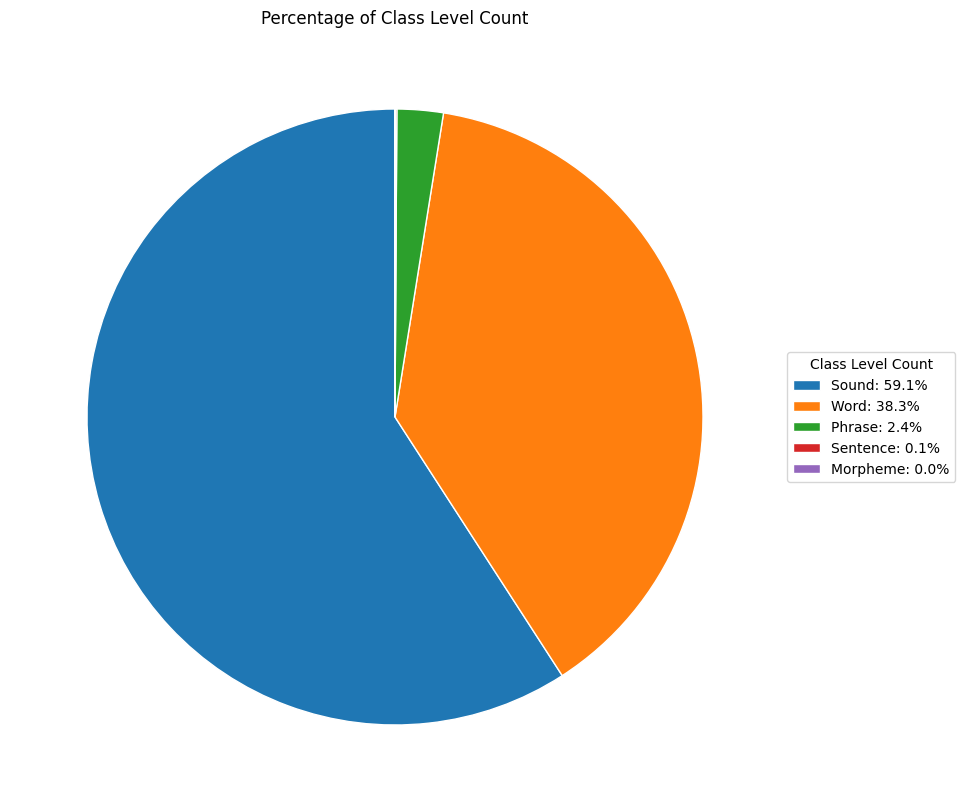

In [142]:
# Generate the counts and labels directly from the data
sizes = data['classLevel'].value_counts()

# Update the labels after merging
labels = sizes.index
percentages = [f"{label}: {size / sizes.sum() * 100:.1f}%" for label, size in zip(labels, sizes)]

# Create the pie chart without percentage labels
plt.figure(figsize=(10, 10))
wedges, texts = plt.pie(
    sizes,
    labels=None,  # Remove labels from the pie slices
    startangle=90,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}  # Adds a white border between slices
)

# Add a legend for the labels without percentages
labels = [f"{label}: {size / sizes.sum() * 100:.1f}%" for label, size in zip(labels, sizes)]
plt.legend(wedges, labels, title="Class Level Count", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


plt.title('Percentage of Class Level Count')
plt.show()

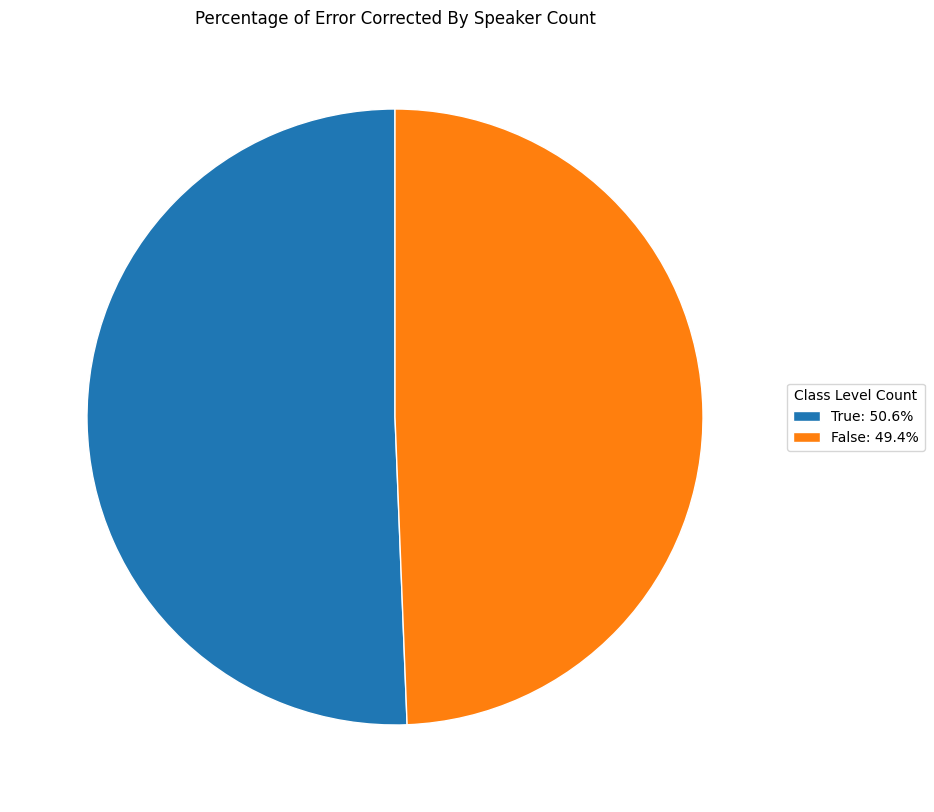

In [143]:
# Generate the counts and labels directly from the data
# only selext when the classTYpe is "Sound"

sizes = data['isErrorCorrectedBySpeaker'].value_counts()


# Update the labels after merging
labels = sizes.index
percentages = [f"{label}: {size / sizes.sum() * 100:.1f}%" for label, size in zip(labels, sizes)]

# Create the pie chart without percentage labels
plt.figure(figsize=(10, 10))
wedges, texts = plt.pie(
    sizes,
    labels=None,  # Remove labels from the pie slices
    startangle=90,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}  # Adds a white border between slices
)

# Add a legend for the labels without percentages
labels = [f"{label}: {size / sizes.sum() * 100:.1f}%" for label, size in zip(labels, sizes)]
plt.legend(wedges, labels, title="Class Level Count", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


plt.title('Percentage of Error Corrected By Speaker Count')
plt.show()

# 1.6. Bar Plot for Categorical Features
# Analyzing the frequency distribution of 'classLevel' and 'classMasterType'

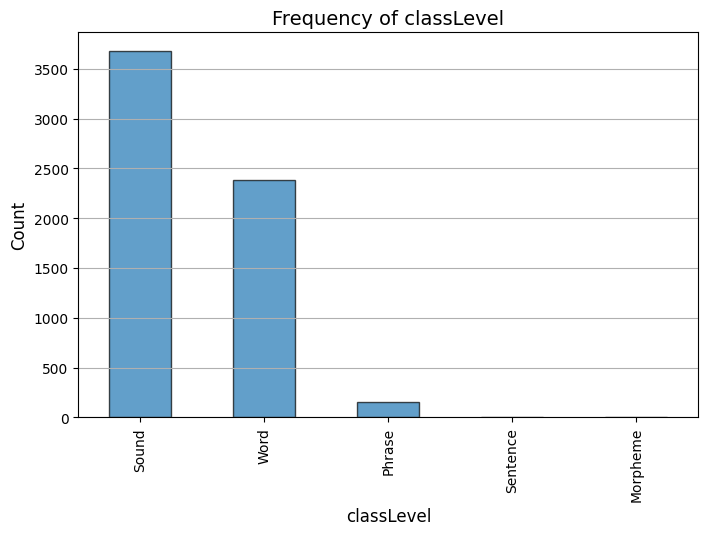

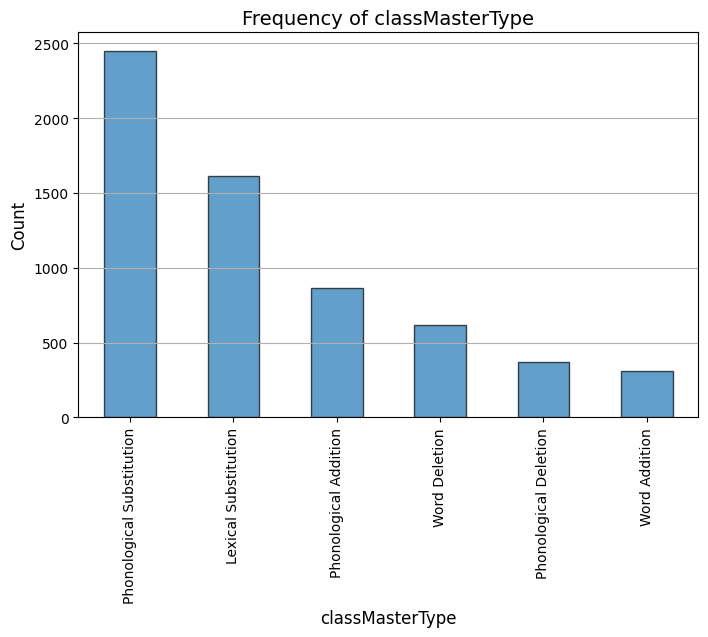

In [144]:
categorical_columns = ['classLevel', 'classMasterType']

for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    data[col].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
    plt.title(f'Frequency of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.grid(axis='y')
    plt.show()



# 2. How rarely the speech error happens

## For each podcast, the event of error count will be:

In [145]:
podcast_counts = data['podcastId'].value_counts().reset_index()
podcast_counts.columns = ['podcastId', 'count']
print(podcast_counts.head())
#print last 10 rows
print(podcast_counts.tail())


  podcastId  count
0    spy110     68
1    spy109     64
2    spy107     58
3     bp257     52
4    spy108     50
    podcastId  count
467    whc055      2
468    whc061      2
469    whc012      1
470    whc079      1
471    whc071      1


## Overall, the sum and average number would be:

In [146]:
podcast_counts.describe()

,count
count,472.000000
mean,13.194915
std,10.606458
min,1.000000
25%,6.000000
50%,10.000000
75%,16.000000
max,68.000000


## Calculate the short error length and long error length

In [147]:
def sound_error_length_calc(column1, column2, column3):
    for index, row in data.iterrows():
        # Calculate the long form error length if start and end times are available
        if pd.notna(row[column1]) and pd.notna(row[column2]):
            if row[column2] > row[column1]:
                data.at[index, column3] = row[column2] - row[column1]
            else:
                data.at[index, column3] = 0

data['longFormErrorLength'] = None
sound_error_length_calc('longFormStart', 'longFormEnd', 'longFormErrorLength')
data['longFormErrorLength'] = pd.to_numeric(data['longFormErrorLength'], errors='coerce')
data['shortFormErrorLength'] = None
sound_error_length_calc('shortFormStart', 'shortFormEnd', 'shortFormErrorLength')
data['shortFormErrorLength'] = pd.to_numeric(data['shortFormErrorLength'], errors='coerce')

data[['longFormErrorLength', 'shortFormErrorLength']].head()


,longFormErrorLength,shortFormErrorLength
0,2.622,0.70
1,6.925,0.42
2,6.824,0.84
3,4.541,0.78
4,5.042,1.22


In [148]:

data[['longFormErrorLength', 'shortFormErrorLength']].describe()

,longFormErrorLength,shortFormErrorLength
count,6228.000000,6228.000000
mean,7.021519,0.485519
std,5.023010,0.978971
min,0.000000,0.000000
25%,4.123000,0.100000
50%,5.785000,0.320000
75%,8.262250,0.621000
max,70.000000,54.212000


In [149]:
import os
import librosa
import pandas as pd

# Define the root directory containing the audio subfolders
audio_dir = '../data/audio_all/wav'

# Create a new column in the DataFrame to store the durations and error lengths
data['audio_duration'] = None


def calculate_duration():

    # Loop through each row in the dataset to calculate the durations and error lengths
    for index, row in data.iterrows():
        podcast_id = row['podcastId']
        
        # Get the subdirectory from the 'podcast' column for the current row
        subdir = row['podcast']  # Access the individual value for this row
        
        # Construct the path to the audio file
        subdir_path = os.path.join(audio_dir, subdir)
        
        try:
            # List the files in the subdirectory to find the matching audio file
            audio_file_name = None
            if os.path.exists(subdir_path):
                #print(subdir_path)# Check if the subdirectory exists
                for file in os.listdir(subdir_path):
                    if file.startswith(podcast_id) and (file.endswith('.wav') or file.endswith('.mp3')):
                        audio_file_name = file
                        break
            
            if audio_file_name:
                audio_path = os.path.join(subdir_path, audio_file_name)
                try:
                    # Load the audio file using librosa and calculate its duration
                    duration = librosa.get_duration(filename=audio_path)
                    data.at[index, 'audio_duration'] = duration
                except Exception as e:
                    #print(f"Error processing file {audio_path}: {e}")
                    data.at[index, 'audio_duration'] = None  # Handle cases where the file cannot be read
            else:
                print(f"No matching audio file found for podcastId: {podcast_id}")
        
        except FileNotFoundError:
            #print(f"Subdirectory not found: {subdir_path}")
            data.at[index, 'audio_duration'] = None  # Handle missing subdirectory

calculate_duration()

/var/folders/jc/ccl73yps6zz661hhx9y7zlg40000gn/T/ipykernel_7406/3633785782.py:38: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  duration = librosa.get_duration(filename=audio_path)
/var/folders/jc/ccl73yps6zz661hhx9y7zlg40000gn/T/ipykernel_7406/3633785782.py:38: FutureWarning: PySoundFile failed. Trying audioread instead.
	Audioread support is deprecated in librosa 0.10.0 and will be removed in version 1.0.
  duration = librosa.get_duration(filename=audio_path)


In [150]:
data[['podcastId', 'audio_duration']].head(10)

,podcastId,audio_duration
0,ac083,1786.745374
1,ac083,1786.745374
2,ac083,1786.745374
3,ac083,1786.745374
4,ac084,2095.922698
5,ac084,2095.922698
6,ac084,2095.922698
7,ac084,2095.922698
8,ac084,2095.922698
9,ac084,2095.922698


In [151]:
data['audio_duration'].describe()


count     6190.000
unique     463.000
top       5094.324
freq        68.000
Name: audio_duration, dtype: float64

In [152]:
data['audio_duration'] = pd.to_numeric(data['audio_duration'], errors='coerce')
data['audio_duration'].describe()

count     6190.000000
mean      3910.161407
std       1935.263481
min          0.072000
25%       1907.292494
50%       4040.766312
75%       5549.119813
max      10359.641875
Name: audio_duration, dtype: float64

In [153]:
## under podcastId column, calculate the duration of each podcastId
podcast_duration = data.groupby('podcastId')['audio_duration'].unique().apply(lambda x: x[0] if len(x) > 0 else None)

podcast_duration = podcast_duration.reset_index()
podcast_duration.columns = ['podcastId', 'total_duration']
podcast_duration.head()

,podcastId,total_duration
0,ac001,1578.162630
1,ac002,1814.350295
2,ac003,1620.990454
3,ac004,1708.291678
4,ac005,1726.472902


In [154]:
podcast_duration.describe()

,total_duration
count,467.000000
mean,2911.999623
std,1802.149212
min,0.072000
25%,1370.462031
50%,2082.269188
75%,4240.835594
max,10359.641875


In [155]:
#drop the podcast rows with less than 1 minute duration
podcast_duration = podcast_duration[podcast_duration['total_duration'] > 60]
podcast_duration.describe()
#sum of total duration

,total_duration
count,465.000000
mean,2924.521276
std,1795.842665
min,794.424313
25%,1374.484937
50%,2095.922698
75%,4240.926688
max,10359.641875


In [156]:

total_duration = podcast_duration['total_duration'].sum()
print(f"Total duration of all podcasts: {total_duration:.2f} seconds")
#convert to minutes
total_duration_minutes = total_duration / 60
print(f"Total duration of all podcasts: {total_duration_minutes:.2f} minutes")


Total duration of all podcasts: 1359902.39 seconds
Total duration of all podcasts: 22665.04 minutes


In [157]:
#merge the poddast_duration with podcast_counts, calculate error per minute
podcast_data = podcast_counts.merge(podcast_duration, on='podcastId')

podcast_data['error_per_second'] = podcast_data['count'] / podcast_data['total_duration']
podcast_data.head()


,podcastId,count,total_duration,error_per_second
0,spy110,68,5094.32400,0.013348
1,spy109,64,4425.12000,0.014463
2,spy107,58,6241.21200,0.009293
3,bp257,52,9924.52025,0.005240
4,spy108,50,4669.23600,0.010708


In [158]:
podcast_data['error_per_second'].describe()

count    465.000000
mean       0.004667
std        0.002363
min        0.000727
25%        0.002919
50%        0.004201
75%        0.005955
max        0.014480
Name: error_per_second, dtype: float64

In [159]:
#Total Long-form Error / Total Audio Length
total_longform_error = data['longFormErrorLength'].sum()
print(f"Total Long-form Error Length: {total_longform_error} seconds")
total_audio_length = podcast_duration['total_duration'].sum()
print(f"Total Audio Length: {total_audio_length} seconds")
longform_error_rate = total_longform_error / total_audio_length
print(f"Total Long-form Error rate: {longform_error_rate} seconds")

Total Long-form Error Length: 43730.019 seconds
Total Audio Length: 1359902.3934953231 seconds
Total Long-form Error rate: 0.03215673360762446 seconds


In [160]:
#Total Short-form Error / Total Audio Length
total_shortform_error = data['shortFormErrorLength'].sum()
print(f"Total Short-form Error Length: {total_shortform_error} seconds")
shortform_error_rate = total_shortform_error / total_audio_length
print(f"Total Short-form Error rate: {shortform_error_rate} seconds")


Total Short-form Error Length: 3023.810999999773 seconds
Total Short-form Error rate: 0.002223550024224714 seconds


In [161]:
# Calculate the error rates for long and short form errors
data['longFormErrorRate'] = data['longFormErrorLength'] / data['audio_duration']
data['shortFormErrorRate'] = data['shortFormErrorLength'] / data['audio_duration']


# if the error rate is more than 1, set it as NaN
data.loc[data['longFormErrorRate'] > 1, 'longFormErrorRate'] = np.nan
data.loc[data['shortFormErrorRate'] > 1, 'shortFormErrorRate'] = np.nan
data[['longFormErrorRate', 'shortFormErrorRate']].head()
#to csv
data[['podcastId',  'shortFormErrorLength', 'longFormErrorLength', 'audio_duration', 'longFormErrorRate', 'shortFormErrorRate']].to_csv('long_short_form_error_rate.csv', index=False) 

In [162]:

data[['longFormErrorRate', 'shortFormErrorRate']].describe()

,longFormErrorRate,shortFormErrorRate
count,6181.000000,6185.000000
mean,0.002402,0.000318
std,0.002161,0.006100
min,0.000000,0.000000
25%,0.000950,0.000031
50%,0.001671,0.000086
75%,0.003280,0.000212
max,0.031340,0.309929


## For one single podcast sound track, the error rate description is 

In [163]:
long_form_error_summary = data.groupby('podcastId').agg(
    total_long_form_error_length=('longFormErrorLength', 'sum'),
    audio_duration=('audio_duration', 'first')  # Assuming each podcastId has one audio file
).reset_index()

# Calculate the ratio of the total long form error length to the audio duration
long_form_error_summary['long_form_error_ratio'] = (
    long_form_error_summary['total_long_form_error_length'] / long_form_error_summary['audio_duration']
)

# if the error rate is more than 1, set it as NaN
long_form_error_summary.loc[long_form_error_summary['long_form_error_ratio'] > 1, 'long_form_error_ratio'] = np.nan

print(long_form_error_summary[['podcastId', 'total_long_form_error_length', 'audio_duration', 'long_form_error_ratio']].head(10))

  podcastId  total_long_form_error_length  audio_duration  \
0     ac001                       142.367     1578.162630   
1     ac002                       156.452     1814.350295   
2     ac003                        61.578     1620.990454   
3     ac004                       119.398     1708.291678   
4     ac005                        80.754     1726.472902   
5     ac006                       173.634     1726.472902   
6     ac007                        66.667     1343.334943   
7     ac008                       215.470     1726.472902   
8     ac009                       148.756     1869.597800   
9     ac010                       138.412     1812.624739   

   long_form_error_ratio  
0               0.090211  
1               0.086230  
2               0.037988  
3               0.069893  
4               0.046774  
5               0.100572  
6               0.049628  
7               0.124804  
8               0.079566  
9               0.076360  


In [164]:
long_form_error_summary['long_form_error_ratio'].describe()

count    465.000000
mean       0.031925
std        0.023234
min        0.002535
25%        0.016915
50%        0.025582
75%        0.039724
max        0.191277
Name: long_form_error_ratio, dtype: float64

In [165]:
short_form_error_summary = data.groupby('podcastId').agg(
    total_short_form_error_length=('shortFormErrorLength', 'sum'),
    audio_duration=('audio_duration', 'first')  # Assuming each podcastId has one audio file
).reset_index()

# Calculate the ratio of the total long form error length to the audio duration
short_form_error_summary['short_form_error_ratio'] = (
    short_form_error_summary['total_short_form_error_length'] / short_form_error_summary['audio_duration']
)

short_form_error_summary.loc[short_form_error_summary['short_form_error_ratio'] > 1, 'short_form_error_ratio'] = np.nan

print(short_form_error_summary[['podcastId', 'total_short_form_error_length', 'audio_duration', 'short_form_error_ratio']].head(10))

  podcastId  total_short_form_error_length  audio_duration  \
0     ac001                          6.787     1578.162630   
1     ac002                          7.185     1814.350295   
2     ac003                          4.663     1620.990454   
3     ac004                          6.985     1708.291678   
4     ac005                          5.124     1726.472902   
5     ac006                          8.363     1726.472902   
6     ac007                          4.473     1343.334943   
7     ac008                         14.389     1726.472902   
8     ac009                          7.264     1869.597800   
9     ac010                          8.806     1812.624739   

   short_form_error_ratio  
0                0.004301  
1                0.003960  
2                0.002877  
3                0.004089  
4                0.002968  
5                0.004844  
6                0.003330  
7                0.008334  
8                0.003885  
9                0.004858  


In [166]:
short_form_error_summary['short_form_error_ratio'].describe()



count    466.000000
mean       0.004216
std        0.041637
min        0.000081
25%        0.001188
50%        0.001867
75%        0.002932
max        0.900340
Name: short_form_error_ratio, dtype: float64

In [167]:
# describe total duration, short form error length, short form error rate
podcast_data = podcast_data.merge(short_form_error_summary[['podcastId', 'total_short_form_error_length', 'short_form_error_ratio']], on='podcastId')
podcast_data[['total_duration', 'total_short_form_error_length', 'short_form_error_ratio']].describe()

,total_duration,total_short_form_error_length,short_form_error_ratio
count,465.000000,465.000000,465.000000
mean,2924.521276,6.468570,0.002289
std,1795.842665,6.294951,0.001723
min,794.424313,0.100000,0.000081
25%,1374.484937,2.421000,0.001188
50%,2095.922698,4.520000,0.001864
75%,4240.926688,8.302000,0.002931
max,10359.641875,67.358000,0.012100


In [168]:
#in the feature extraction part, the duration per event is in length of 0.02 seconds. calculate total event number interms of total duration length
single_event_duration = 0.02
total_event_count = total_audio_length / single_event_duration
print(f"Total Event Count: {total_event_count:.0f}")

Total Event Count: 67995120


In [169]:
#number of rows of data
total_short_form_error_count = data['shortFormError'].notnull().sum()



In [170]:
imbalance_ratio =(total_event_count -  total_short_form_error_count) / total_short_form_error_count

In [171]:

print(f"Imbalance Ratio: {imbalance_ratio:.8f}")

Imbalance Ratio: 10934.20740990


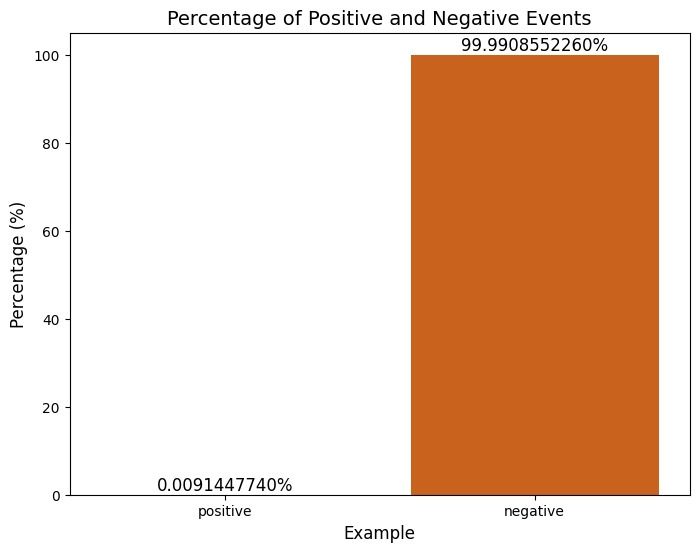

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you already have total_event_count and total_short_form_error_count
negative_event_count = total_event_count - total_short_form_error_count

# Calculate percentages
positive_percentage = (total_short_form_error_count / total_event_count) * 100
negative_percentage = (negative_event_count / total_event_count) * 100

# Define the data for the bar plot
data_plot = pd.DataFrame({
    'example': ['positive', 'negative'],
    'value': [positive_percentage, negative_percentage]  # Percentages of positive and negative events
})

# Define the custom color
custom_color = '#e65c00'

# Plotting the bar chart with the specified color
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x='example', y='value', data=data_plot, color=custom_color)

# Adding title and labels
plt.title('Percentage of Positive and Negative Events', fontsize=14)
plt.xlabel('Example', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# Annotate the bars with the percentage values rounded to 10 decimal places
for i, value in enumerate(data_plot['value']):
    bar_plot.text(i, value + 1, f'{value:.10f}%', ha='center', fontsize=12)  # 10 decimals

# Display the chart
plt.show()

Short Form Error Duration Percentage: 0.222355%


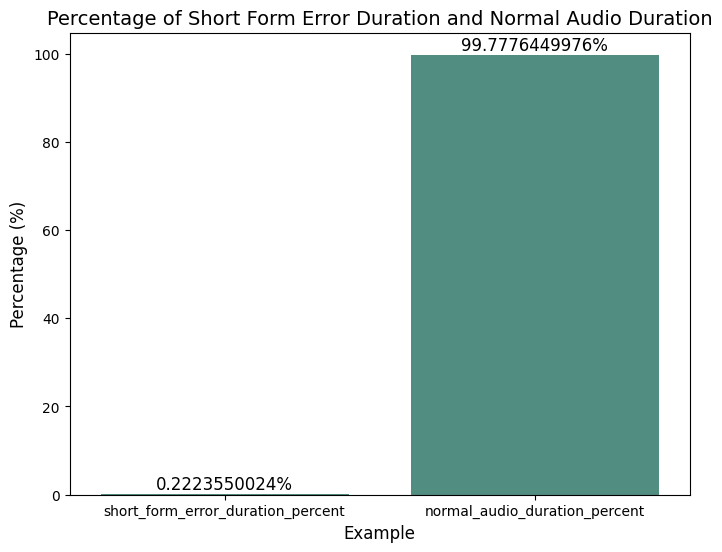

In [173]:
# generate the percentage of short error duration of all audio duration
short_form_error_duration = data['shortFormErrorLength'].sum()
short_form_error_duration_percentage = (short_form_error_duration / total_audio_length) * 100
normal_audio_duration_percentage = 100 - short_form_error_duration_percentage



print(f"Short Form Error Duration Percentage: {short_form_error_duration_percentage:.6f}%")

#plot in hist plot
data_plot_2 = pd.DataFrame({
    'example': ['short_form_error_duration_percent', 'normal_audio_duration_percent'],
    'value': [short_form_error_duration_percentage, normal_audio_duration_percentage]  # Percentages of positive and negative events
})

custom_color = '#489788'
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x='example', y='value', data=data_plot_2, color=custom_color)

for i, value in enumerate(data_plot_2['value']):
    bar_plot.text(i, value + 1, f'{value:.10f}%', ha='center', fontsize=12)  # 10 decimals

plt.title('Percentage of Short Form Error Duration and Normal Audio Duration', fontsize=14)
plt.xlabel('Example', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

plt.show()


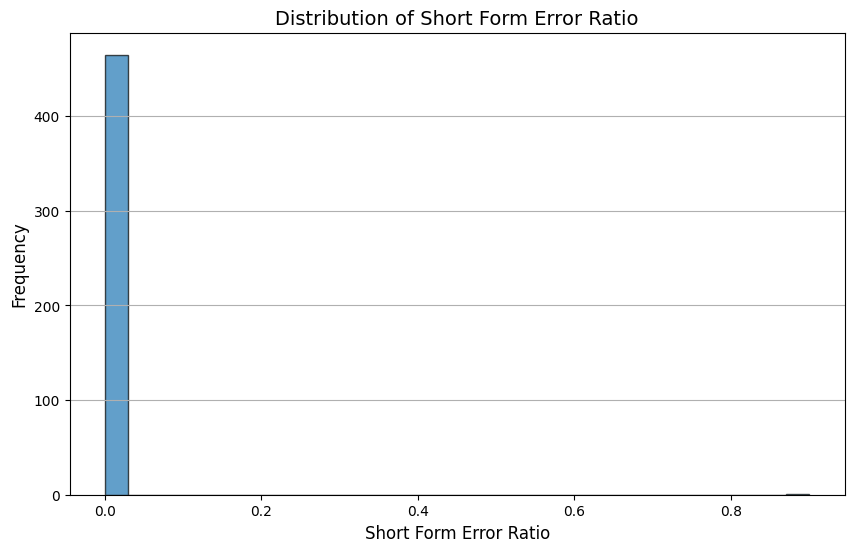

In [174]:
#visualize the short form error rate to show how rare it is

plt.figure(figsize=(10, 6))
plt.hist(short_form_error_summary['short_form_error_ratio'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Short Form Error Ratio', fontsize=14)
plt.xlabel('Short Form Error Ratio', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y')
plt.show()

In [175]:
#list top 10 podcast with highest short form error rate
short_form_error_summary.sort_values('short_form_error_ratio', ascending=False).head(10)

,podcastId,total_short_form_error_length,audio_duration,short_form_error_ratio
393,whc063,1.223,1.358375,0.900340
50,ac064,19.939,1647.818571,0.012100
140,bp248,67.358,5571.083500,0.012091
86,ac360,16.487,1627.468821,0.010130
38,ac051,17.167,1785.240476,0.009616
416,whc086,10.925,1203.498125,0.009078
407,whc077,10.448,1197.845437,0.008722
61,ac079,16.776,1926.119365,0.008710
7,ac008,14.389,1726.472902,0.008334
29,ac042,13.969,1698.590748,0.008224


In [176]:
#matth the long form error, short form error, length and rate, error count into podcastId
summary = podcast_data.merge(long_form_error_summary, on='podcastId')
summary = summary.merge(short_form_error_summary, on='podcastId')
#all duration in minutes
summary['total_duration'] = summary['total_duration'] / 60
summary.head()

,podcastId,count,total_duration,error_per_second,total_short_form_error_length_x,short_form_error_ratio_x,total_long_form_error_length,audio_duration_x,long_form_error_ratio,total_short_form_error_length_y,audio_duration_y,short_form_error_ratio_y
0,spy110,68,84.905400,0.013348,31.966,0.006275,974.425,5094.32400,0.191277,31.966,5094.32400,0.006275
1,spy109,64,73.752000,0.014463,28.626,0.006469,845.982,4425.12000,0.191177,28.626,4425.12000,0.006469
2,spy107,58,104.020200,0.009293,28.628,0.004587,708.842,6241.21200,0.113574,28.628,6241.21200,0.004587
3,bp257,52,165.408671,0.005240,21.704,0.002187,283.225,9924.52025,0.028538,21.704,9924.52025,0.002187
4,spy108,50,77.820600,0.010708,24.312,0.005207,610.245,4669.23600,0.130695,24.312,4669.23600,0.005207
